In [13]:
import sys
sys.path.append(
    '../generate_sequence/'
)
from generate_sequence import get_best_laminate_random
from composipy import OrthotropicMaterial, LaminateProperty, PlateStructure

In [140]:
# #t = 1.016
# #=========================
r, xi1D, xi3D, nplies = 0.0,  5.e-05, -1.e+00, 8
r, xi1D, xi3D, nplies = 0.5, -0.47913233, -0.04183533, 8
r, xi1D, xi3D, nplies = 1.0, -0.74205514,  0.48401028, 8
r, xi1D, xi3D, nplies = 1.5, -0.87087838,  0.74165676, 8
r, xi1D, xi3D, nplies = 2.0, -0.94734667,  0.89459334, 8
r, xi1D, xi3D, nplies = 2.5, -0.99798696,  0.99587392, 8

# #t = 1.524
# #=========================
r, xi1D, xi3D, nplies = 0.0,  5.e-05, -1.e+00, 12
r, xi1D, xi3D, nplies = 0.5, -0.47913166, -0.04183668, 12
r, xi1D, xi3D, nplies = 1.0, -0.74205532,  0.48401064, 12
r, xi1D, xi3D, nplies = 1.5, -0.87087798,  0.74165596, 12
r, xi1D, xi3D, nplies = 2.0, -0.94734641,  0.89459281, 12
r, xi1D, xi3D, nplies = 2.5, -0.99798689,  0.99587378, 12

# #t = 2.032
# #=========================
r, xi1D, xi3D, nplies = 0.0,  5.e-05, -1.e+00, 16
r, xi1D, xi3D, nplies = 0.5, -0.47913146, -0.04183707, 16
r, xi1D, xi3D, nplies = 1.0, -0.74205528,  0.48401057, 16
r, xi1D, xi3D, nplies = 1.5, -0.87087769,  0.74165539, 16
r, xi1D, xi3D, nplies = 2.0, -0.94734671,  0.89459341, 16
r, xi1D, xi3D, nplies = 2.5, -0.99798709,  0.99587418, 16

# #t = 3.048
# #=========================
r, xi1D, xi3D, nplies = 0.0,  5.e-05, -1.e+00, 24
r, xi1D, xi3D, nplies = 0.5, -0.47913166, -0.04183667, 24
r, xi1D, xi3D, nplies = 1.0, -0.74205529,  0.48401058, 24
r, xi1D, xi3D, nplies = 1.5, -0.87087768,  0.74165535, 24
r, xi1D, xi3D, nplies = 2.0, -0.94734673,  0.89459346, 24
r, xi1D, xi3D, nplies = 2.5, -0.99798702,  0.99587404, 24

BEST SOLUTION IS
(0.5564899334878932, [90, 90, 90, 0, 90, 45, -45, 0, 0, 90, 45, -45, -45, 45, 90, 0, 0, -45, 45, 90, 0, 90, 90, 90])


[90,
 90,
 90,
 0,
 90,
 45,
 -45,
 0,
 0,
 90,
 45,
 -45,
 -45,
 45,
 90,
 0,
 0,
 -45,
 45,
 90,
 0,
 90,
 90,
 90]

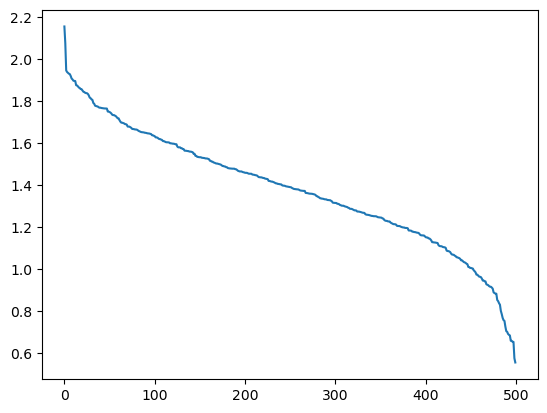

In [141]:
#get_best_laminate_random(xi1D, xi3D, n_plies, n_sequences=500, detailed=False)
t = 0.127
stack = get_best_laminate_random(xi1D, xi3D, nplies, detailed=True)
stack

In [142]:
E1 = 128e3
E2 = 13e3
G12 = 6.4e3
v12 = 0.3
a = 508
b = 254
m = 10
n = 10
panel_constraint = 'PINNED'

Nxx = -1
Nyy = -1 * r
Nxy = -0


In [143]:
mat = OrthotropicMaterial(E1, E2, v12, G12, t)
lam = LaminateProperty(stacking=stack, plies=mat)
plate = PlateStructure(lam, a, b, panel_constraint, Nxx, Nyy, Nxy, m, n)

plate.buckling_analysis()

(array([14.82858919, 19.59044339, 31.45756514, 51.5510082 , 56.60463885]),
 array([[-7.42028563e-01,  1.14267323e+00,  1.16224658e+00,
          1.00052311e+00,  4.10613106e-01],
        [ 6.51140802e-01, -1.00637273e+00, -1.02033871e+00,
         -9.37914798e-01,  3.29282961e-01],
        [-3.73221397e-01,  5.74953588e-01,  5.84969732e-01,
          5.24805729e-01, -4.78559628e-02],
        [-3.24532744e-02,  3.84949211e-02,  5.63656109e-02,
          9.70456429e-02, -6.68062561e-01],
        [ 2.92365978e-02, -4.60190505e-02, -4.62306560e-02,
         -4.29682860e-02,  9.10815814e-03],
        [-1.65256086e-02,  1.22036266e-02,  2.26106495e-02,
         -3.36055865e-03,  1.26763822e-01],
        [-9.18087112e-04,  6.49248479e-04,  1.60773564e-03,
          1.05174736e-03, -3.63065742e-03],
        [ 6.13428902e-03, -1.39802382e-02, -1.05297428e-02,
         -1.38861804e-02, -1.01565665e-02],
        [-3.81743289e-04,  5.11297707e-04,  6.79884892e-04,
          1.24070119e-04,  5.2555